# Cross Validation

The purpose of this section is to investigate whether (and how well) cross validation can recover the true sparsity parameter $k$. We tested normal, logistic, and poisson cross validation results using 5 fold cross validation across 20 different model sizes $k \in \{1,2,...,20\}$ where $k_{true} = 10$. Since the purpose is on validating cross validation and not to test scalability, we ran code on 5000 samples and 100000 SNPs.

In [15]:
versioninfo()

Julia Version 1.0.3
Commit 099e826241 (2018-12-18 01:34 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-3740QM CPU @ 2.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, ivybridge)


In [16]:
# using StatsPlots
using DelimitedFiles
using Statistics
using Plots
using PyPlot
axisfont = Plots.font("Helvetica", 16)
ticfont = Plots.font("Helvetica", 12)
pyplot(guidefont=axisfont, xtickfont=ticfont, ytickfont=ticfont, legendfont=axisfont)

Plots.PyPlotBackend()

In [17]:
normal_cv_drs       = readdlm("normal_cv_drs") #drs stands for deviance residuals = MSEs
normal_cv_memory    = readdlm("normal_cv_memory")
normal_cv_run_times = readdlm("normal_cv_run_times")

normal_cv_drs_nodebias       = readdlm("normal_nodebias_cv_drs")
normal_cv_memory_nodebias    = readdlm("normal_nodebias_cv_memory")
normal_cv_run_times_nodebias = readdlm("normal_nodebias_cv_run_times")

logistic_cv_drs       = readdlm("logistic_cv_drs")
logistic_cv_memory    = readdlm("logistic_cv_memory")
logistic_cv_run_times = readdlm("logistic_cv_run_times")

logistic_cv_drs_nodebias       = readdlm("logistic_nodebias_cv_drs")
logistic_cv_memory_nodeibas    = readdlm("logistic_nodebias_cv_memory")
logistic_cv_run_times_nodebias = readdlm("logistic_nodebias_cv_run_times")

poisson_cv_drs       = readdlm("poisson_cv_drs")
poisson_cv_memory    = readdlm("poisson_cv_memory")
poisson_cv_run_times = readdlm("poisson_cv_run_times")

poisson_cv_drs_nodebias       = readdlm("poisson_nodebias_cv_drs")
poisson_cv_memory_nodeibas    = readdlm("poisson_nodebias_cv_memory")
poisson_cv_run_times_nodebias = readdlm("poisson_nodebias_cv_run_times")

# negativebinomial_cv_drs       = readdlm("negativebinomial_cv_drs")
# negativebinomial_cv_memory    = readdlm("negativebinomial_cv_memory")
# negativebinomial_cv_run_times = readdlm("negativebinomial_cv_run_times")

negativebinomial_cv_drs_nodebias       = readdlm("negativebinomial_nodebias_cv_drs")
negativebinomial_cv_memory_nodeibas    = readdlm("negativebinomial_nodebias_cv_memory")
negativebinomial_cv_run_times_nodebias = readdlm("negativebinomial_nodebias_cv_run_times")

30×1 Array{Float64,2}:
 285.06390422 
 279.863911513
 280.971510584
 431.862610731
 289.931125916
 378.358364206
 364.320530149
 276.451211526
 314.747621389
 376.989917192
 298.231620678
 300.275857518
 317.302010672
   ⋮          
 284.388087417
 335.846065974
 278.40745999 
 305.376373567
 396.983519913
 265.265364679
 301.87676002 
 345.313536423
 288.769732323
 317.442022881
 269.808993075
 304.894038015

# Normal cv plot

11.0


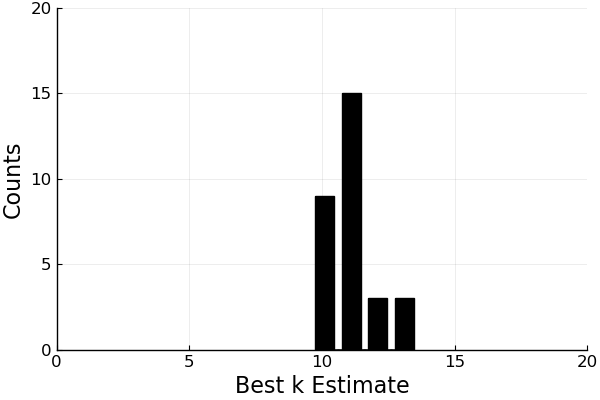

In [18]:
best_k_normal = zeros(30)
for i in 1:30
    best_k_normal[i] = argmin(normal_cv_drs[:, i])
end
println(median(best_k_normal))

normal_bar = histogram(best_k_normal, ylim = (0, 20), xlim = (0, 20), legend=false, bar_width=0.7,
     color = :black, ylabel="Counts", bins=20, xlabel="Best k Estimate")

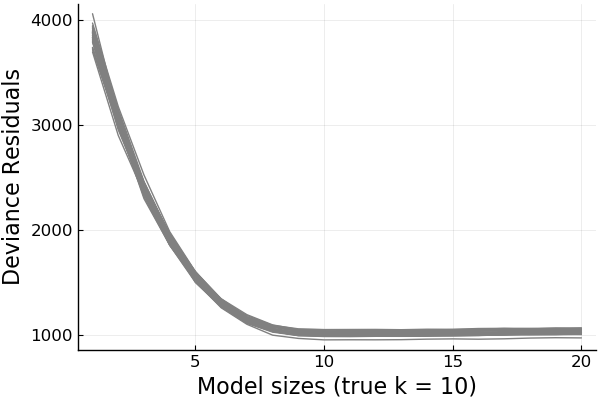

In [19]:
models = collect(1:20)
mylabels = Matrix{String}(undef, 1, 30)
for i in 1:30
    mylabels[1, i] = "run $i"
end
normal_plt = Plots.plot(models, normal_cv_drs, label=mylabels, legend=false, 
    color = :grey, ylabel = "Deviance Residuals", xlabel = "Model sizes (true k = 10)")

# Logistic CV plot 

9.0


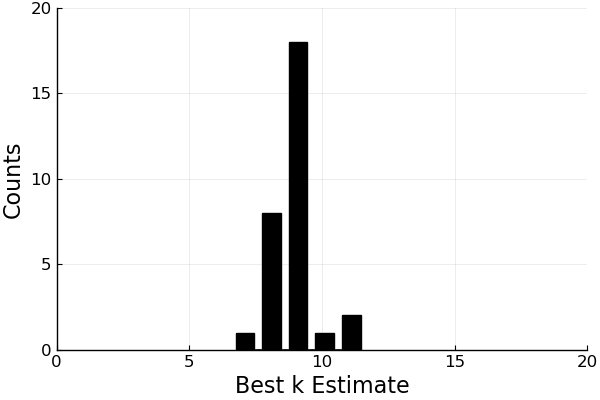

In [20]:
best_k_logistic = zeros(30)
for i in 1:30
    best_k_logistic[i] = argmin(logistic_cv_drs[:, i])
end
println(median(best_k_logistic))

logistic_bar = histogram(best_k_logistic, ylim = (0, 20), xlim = (0, 20), legend=false, 
    color = :black, xlabel="Best k Estimate", bins=20, bar_width=0.7, 
    ylabel="Counts")

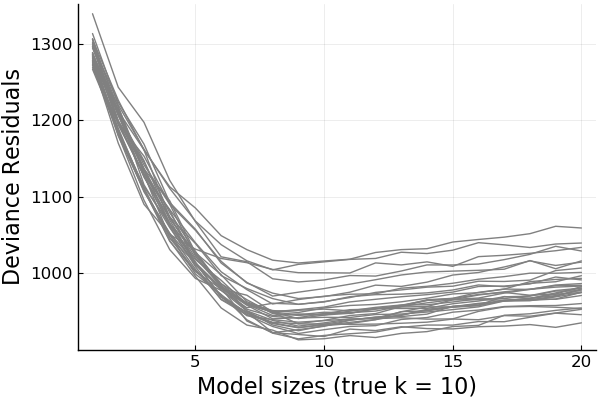

In [21]:
logistic_plt = Plots.plot(models, logistic_cv_drs, label=mylabels, legend=false, 
    color = :grey, xlabel = "Model sizes (true k = 10)", ylabel = "Deviance Residuals")

# Poisson CV plot

10.0


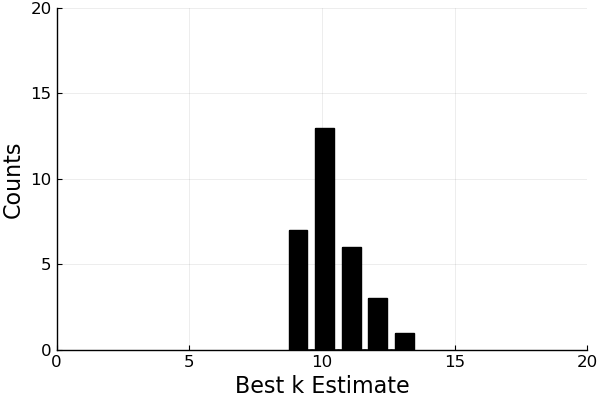

In [22]:
best_k_poisson = zeros(30)
for i in 1:30
    best_k_poisson[i] = argmin(poisson_cv_drs_nodebias[:, i])
end
println(median(best_k_poisson))
poisson_bar = histogram(best_k_poisson, ylim = (0, 20), xlim = (0, 20), legend=false, 
    color = :black, bins=20, xlabel="Best k Estimate", bar_width=0.7,
    ylabel="Counts")

In [23]:
#since there is some outliers with very large errors, remove them for prettier plot
[maximum(poisson_cv_drs_nodebias[:, i]) > 50000 && println(i) for i in 1:30];

6
14


In [24]:
poisson_cv_drs_nodebias_removed_outliers = 
    [poisson_cv_drs_nodebias[:, 1:5] poisson_cv_drs_nodebias[:, 7:13] poisson_cv_drs_nodebias[:, 15:end]]  

20×28 Array{Float64,2}:
 10946.3   11656.4   10178.7   11499.9   …  11094.9   10642.0   11129.4 
  7863.47   8059.51   7684.37   9305.65      8029.39   7551.93   7712.77
  6380.95   6377.93   6053.09   6460.24      6037.67   6035.36   5921.21
  4966.52   4472.06   4906.13   5306.65      4871.26   4708.54   4861.24
  3787.24   3673.07   3878.33   4134.95      4291.12   3845.31   3934.74
  3179.99   3158.37   3013.68   3474.18  …   3846.68   3333.66   3307.07
  2810.98   2640.27   2622.78   3092.62      3177.4    2923.18   2877.0 
  2349.18   2427.19   2188.55   2776.15      2700.87   2697.3    2659.34
  2198.29   2236.09   1929.2    2520.83      2533.75   2512.17   2524.51
  2127.51   2179.69   1852.98   2535.88      2474.02   2543.96   2598.42
  2180.47   2213.81   1932.32   2568.37  …   2508.23   2569.51   2506.93
  2277.08   2252.46   1951.62   2539.87      2402.66   2569.83   2555.06
  2254.44   2270.92   1973.46   2648.79      2352.24   2595.52   2608.02
  2288.94   2306.5    1985.

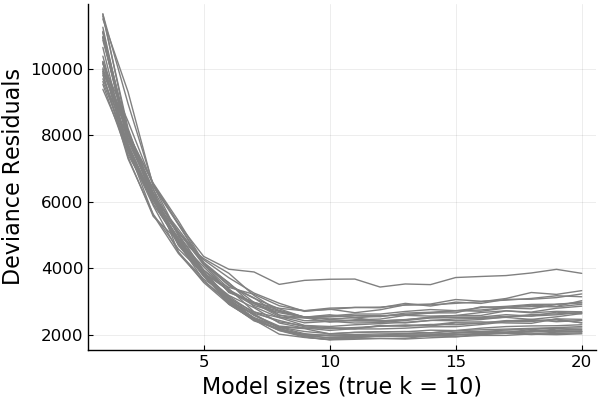

In [25]:
# clamp!(poisson_cv_drs_nodebias, 0, 11000) #some drs are above 1e16, which is hard to plot
poisson_plt = Plots.plot(models, poisson_cv_drs_nodebias_removed_outliers, color = :grey, 
    label=mylabels, legend=false, ylabel = "Deviance Residuals",
    xlabel = "Model sizes (true k = 10)")

# Negative Binomial Plots

best_k_negbin = [10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 10.0, 10.0, 10.0, 10.0]
10.0


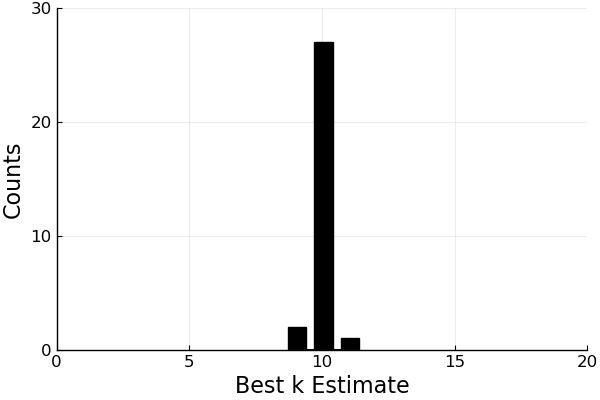

In [26]:
best_k_negbin = zeros(30)
for i in 1:30
    best_k_negbin[i] = argmin(negativebinomial_cv_drs_nodebias[:, i])
end
@show best_k_negbin
println(median(best_k_negbin))

negativebinomial_bar = histogram(best_k_negbin, ylim = (0, 30), xlim = (0, 20), legend=false, 
    color = :black, bins=20, xlabel="Best k Estimate", bar_width=0.7,
    ylabel="Counts")

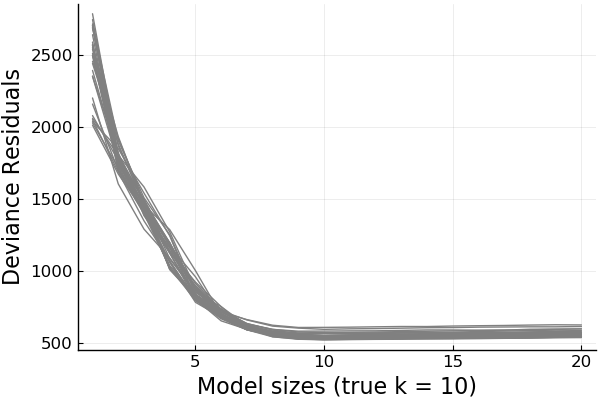

In [27]:
negativebinomial_plt = Plots.plot(models, negativebinomial_cv_drs_nodebias, color = :grey,
    label=mylabels, legend=false, ylabel = "Deviance Residuals", 
    xlabel = "Model sizes (true k = 10)")

In [24]:
Plots.savefig(normal_plt, "normal_plt")
Plots.savefig(logistic_plt, "logistic_plt")
Plots.savefig(poisson_plt, "poisson_plt")
Plots.savefig(negativebinomial_plt, "negativebinomial_plt")

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1342
└ @ Plots /Users/biona001/.julia/packages/Plots/UQI78/src/backends/pyplot.jl:1342
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1342
└ @ Plots /Users/biona001/.julia/packages/Plots/UQI78/src/backends/pyplot.jl:1342
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1342
└ @ Plots /Users/biona001/.julia/packages/Plots/UQI78/src/backends/pyplot.jl:1342


In [25]:
Plots.savefig(normal_bar, "normal_bar")
Plots.savefig(logistic_bar, "logistic_bar")
Plots.savefig(poisson_bar, "poisson_bar")
Plots.savefig(negativebinomial_bar, "negativebinomial_bar")